# Tek Örneklem Hipotez Testi Örnekleri

Örneklere geçmeden önce hipotez testinin adımlarını göreceğiz. Daha sonra **scipy.stats.norm.ppf / scipy.stats.t.ppf / scipy.stats.chi2.ppf** ile tablolardan kritik değer bulmayı göreceğiz. Ardından test istatistiklerini hesaplayan fonksiyonlar tanımlayacağız. Son olarak **scipy.stats.norm.cdf / scipy.stats.t.cdf / scipy.stats.chi2.cdf** ile P değerini bulmayı göreceğiz. Test istatistiğini hesaplayıp **.cdf** işlevine yazdıktan sonra P değerini elde etmiş oluruz. P değeri ile de $a$'yı karşılaştırıp $H_0$ hipotezinin ret edilip edilmeyeceğini karar veririz. Yani aslında, sadece P değeri ve Test istatistiğinin karşılaştırmasını yaparak bir karara varabiliriz. Ancak biz örneklerde hem test istatistiğinin kritik değerlerle karşılaştırmasını hem de P değerinin $a$ ile karşılaştırmasını yapacağız.

In [1]:
def ayrac():
    print("\n*****\n")

**Hipotez Testinin Adımları:**

$1. Adım:$

$H_0$ ve $H_1$ hipotezleri ve $H_0$ hipotezinin doğru olmasına rağmen reddedilme olasılığı ($a$) belirlenir. Ayrıca hipotezin yönü de belirlenir. Çift yönlü mü tek yönlü mü olduğuna soruya göre karar verilir.

$H_0$ = Sıfır hipotezidir. Yani, standart teoriye uygun olarak parametre hakkında beklenenin belirtilmesidir. 

$H_1$ = Yokluk, karşıt hipotezidir. Yani, araştırmacının kitle parametresi hakkında ortaya attığı iddiadır. 

$2. Adım:$

Test yapabilmek için $H_0$ hipotezi doğru olduğunda test istatistiğinin dağılımı ($Z$, $T$, $\chi^{2}$, $F$) bilinmesi gerekir. Normalde bu dağılımı bulabilmek için ayrı testler yapılır ancak biz örneklerde Normal dağıldığını varsayacağız. Bu adımda test istatistiği belirlenir. Belirlendikten sonra, kitleden rastgele seçilen örneklem için test istatistiğinin değeri hesaplanır.

$3. Adım:$

Test istatistiğinin dağılımına ve belirlenen $a$ değerine bağlı olarak kritik değerler bulunur. Test istatistiğinin değeri, kritik değer ile karşılaştırılarak sıfır hipotezi hakkında yorum yapılır. 

Kritik Değer = Kabul bölgesini, ret bölgesinden ayıran tablo değeridir.

    Ret Bölgesi = Test istatistiğinin dağılımına göre sıfır hipotezinin reddedildiği bölgedir.

**P Değeri:**

$H_0$ hipotezi doğru olduğunda, test istatistiğinin hesaplanan değerinden, dağılımın uçlarına kadar olan olasılık değeridir.

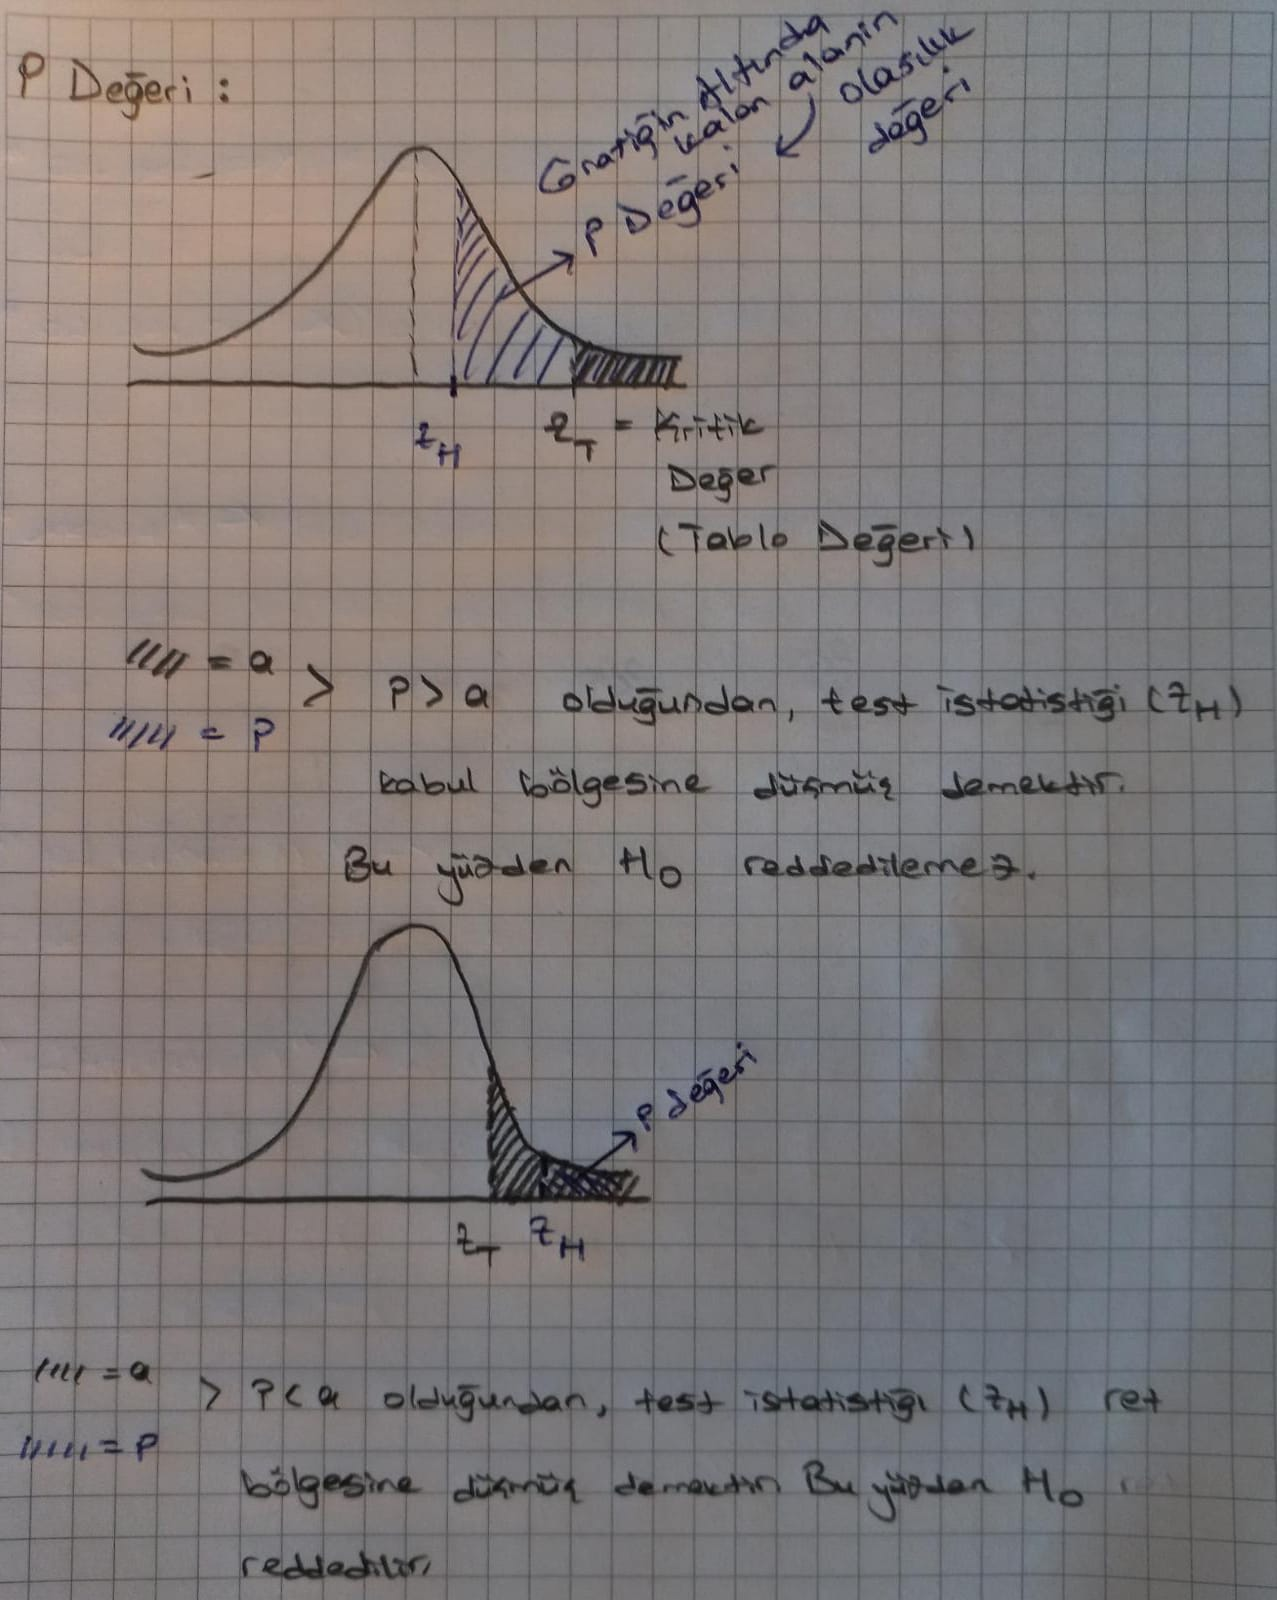

Python'da hipotez testi yaparken kullanacağımız **scipy.stats.norm.cdf / scipy.stats.t.cdf / scipy.stats.chi2.cdf** fonksiyonları test istatistiğini girdiğimizde, bize P değerini döndürürler.

## Test İstatistiği Formülleri


**Kitle Ortalaması İçin Hipotez Testi:**

+ Kitle varyansı biliniyor iken test istatistiği: $Z$ = $\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$


+ Kitle varyansı bilinmiyor + $n\geq30$ iken test istatistiği: $Z$ = $\frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$


+ Kitle varyansı bilinmiyor + $n\leq30$ iken test istatistiği: $T$ = $\frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$

**Kitle Varyansı İçin Hipotez Testi:**

+ Varyans için test istatistiği: $\chi^2$ = $(n-1)\frac{s^2}{\sigma_0^2}$

**Kitle Oranı İçin Hipotez Testi:**

+ Oran için test istatistiği: $Z$ = $\frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$

## Test İstatistiği Fonksiyonları

In [2]:
#KİTLE ORTALAMASI İÇİN TEST İSTATİSTİĞİ FONKSİYONU

def pop_mean_test_stat(xbar, mu, std, n):
    """
    xbar = Örneklem Ortalaması
    mu = Kitle Ortalaması (Test Edilen Parametre)
    std = Kitle veya Örneklem Standart Sapması
    n = Örneklemdeki Öğe Sayısı
    """
    import numpy as np
    return (xbar - mu) / (std/np.sqrt(n))

print(pop_mean_test_stat(xbar = 1050, mu = 1000, std = 100, n = 35))
print(pop_mean_test_stat(xbar = 0.73, mu = 0.7, std = 0.06, n = 20))

2.9580398915498076
2.2360679774997916


In [3]:
#KİTLE VARYANSI İÇİN TEST İSTATİSTİĞİ FONKSİYONU

def pop_var_test_stat(s_square, sigma_square, n):
    """
    s_square = Örneklem Varyansı
    sigma = Kitle Varyansı (Test Edilen Parametre)
    n = Örneklemdeki Öğe Sayısı
    """
    return ((n-1)*s_square) / sigma_square

print(pop_var_test_stat(s_square = 196, sigma_square = 144, n = 20))

25.86111111111111


In [4]:
#KİTLE ORANI İÇİN TEST İSTATİSTİĞİ FONKSİYONU 

def pop_per_test_stat(p_hat, p, n):
    """
    p_hat = Örneklem Oranı
    p = Kitle Oranı (Test Edilen Parametre)
    n = Örneklemdeki Öğe Sayısı
    """
    import numpy as np
    return (p_hat - p) / (np.sqrt(p*(1-p)/n))

print(pop_per_test_stat(p_hat = 0.75, p = 0.65, n = 300))

3.631365196012814


## Z, T ve Ki-Kare Tablolarından Kritik Değer Hesabı

**NOT:**

+ Hesaplamaları göstermeden önce şu bilgiyi vermekte fayda var: Eğer ppf fonksiyonundaki 'q' parametresine gireceğimiz değeri '1-0.05' şeklinde yazarsak dağılımın sağ ucundaki pozitif değeri döndürür. Direkt olarak '0.05' şeklinde yazarsak dağılımın sol ucundaki negatif değeri döndürür.

**Z Tablosundan Tablo Değeri Bulma (Kritik Değer Hesabı):**

+ scipy.stats.norm = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [5]:
import scipy.stats

#1-a = 0.99, a = 0.01 ve a/2 = 0.005 iken Z0.005 tablo değerini bulacağız.
z_score = scipy.stats.norm.ppf(q = 1-0.005, loc = 0, scale = 1)
print("%99 güven düzeyinde z skoru (tablo değeri) :", z_score)

#1-a = 0.95, a = 0.05 ve a/2 = 0.025 iken Z0.025 tablo değerini bulacağız
z_score_1 = scipy.stats.norm.ppf(q = 1 - 0.025, loc = 0, scale = 1)
print("%95 güven düzeyinde z skoru (tablo değeri) :", z_score_1)

#1-a = 0.90, a = 0.10 ve a/2 = 0.05 iken Z0.05 tablo değerini bulacağız
z_score_2 = scipy.stats.norm.ppf(q = 1-0.05, loc = 0, scale = 1)
print("%90 güven düzeyinde z skoru (tablo değeri) :", z_score_2)

%99 güven düzeyinde z skoru (tablo değeri) : 2.5758293035489004
%95 güven düzeyinde z skoru (tablo değeri) : 1.959963984540054
%90 güven düzeyinde z skoru (tablo değeri) : 1.6448536269514722


**T Tablosundan Tablo Değeri Bulma ($t_{\frac{\alpha}{2}, n-1}$) (Kritik Değer Hesabı):**

+ scipy.stats.t = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t

In [6]:
import scipy.stats

#1-a = 0.99, a = 0.01, a/2 = 0.005 ve df = 10 iken 
#T0.005,10 tablo değerini bulacağız.
t_score = scipy.stats.t.ppf(q = 1-0.005, df = 10, loc = 0, scale = 1)
print("%99 güven düzeyinde t skoru (tablo değeri) :", t_score)

#1-a = 0.95, a = 0.05, a/2 = 0.025 ve df = 10 iken 
#T0.025,10 tablo değerini bulacağız.
t_score_1 = scipy.stats.t.ppf(q = 1-0.025, df = 10, loc = 0, scale = 1)
print("%95 güven düzeyinde t skoru (tablo değeri) :", t_score_1)

#1-a = 0.90, a = 0.10, a/2 = 0.05 ve df = 10 iken 
#T0.05,10 tablo değerini bulacağız.
t_score_2 = scipy.stats.t.ppf(q = 1-0.05, df = 10, loc = 0, scale = 1)
print("%90 güven düzeyinde t skoru (tablo değeri) :", t_score_2)

%99 güven düzeyinde t skoru (tablo değeri) : 3.169272667175838
%95 güven düzeyinde t skoru (tablo değeri) : 2.2281388519649385
%90 güven düzeyinde t skoru (tablo değeri) : 1.8124611228107335


**Ki-Kare Tablosundan Tablo Değeri Bulma (${\chi^2_{1-\frac{\alpha}{2},n-1}}$ ve ${\chi^2_{\frac{\alpha}{2},n-1}}$) (Kritik Değer Hesabı):**

+ scipy.stats.chi2 = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

In [7]:
import scipy.stats

#1-a = 99, a = 0.01, a/2 = 0.005 ve df = 9 iken
#Ki-Kare 1-a/2, n-1 (Upper) ve Ki-Kare a/2, n-1 (Lower) tablo değerlerini bulacağız
chi2_upper = scipy.stats.chi2.ppf(q = 1-0.005, df = 9)
chi2_lower = scipy.stats.chi2.ppf(q = 0.005, df = 9)
print("%99 güven düzeyinde chi2 tablo değerleri:", chi2_lower, chi2_upper)

#1-a = 95, a = 0.05, a/2 = 0.025 ve df = 9 iken
#Ki-Kare 1-a/2, n-1 (Upper) ve Ki-Kare a/2, n-1 (Lower) tablo değerlerini bulacağız
chi2_upper_1 = scipy.stats.chi2.ppf(q = 1 - 0.025, df = 9)
chi2_lower_1 = scipy.stats.chi2.ppf(q = 0.025, df = 9)
print("%95 güven düzeyinde chi2 tablo değerleri:", chi2_lower_1, chi2_upper_1)

#1-a = 90, a = 0.10, a/2 = 0.05 ve df = 9 iken
#Ki-Kare 1-a/2, n-1 (Upper) ve Ki-Kare a/2, n-1 (Lower) tablo değerlerini bulacağız
chi2_upper_2 = scipy.stats.chi2.ppf(q = 1-0.05, df = 9)
chi2_lower_2 = scipy.stats.chi2.ppf(q = 0.05, df = 9)
print("%90 güven düzeyinde chi2 tablo değerleri:", chi2_lower_2, chi2_upper_2)

%99 güven düzeyinde chi2 tablo değerleri: 1.7349329049966602 23.589350781257387
%95 güven düzeyinde chi2 tablo değerleri: 2.7003894999803584 19.02276779864163
%90 güven düzeyinde chi2 tablo değerleri: 3.325112843066815 16.918977604620448


## P Değerinin Hesaplanması 

P değerini Python'da hesaplamak için **scipy.stats.xx.cdf** işlevini kullanırız. Burada **xx**, test istatistiğinin dağılımını temsil eder. CDF'in açılımı; cumulative distrubition funciton (Kümülatif Dağılım Fonksiyonu)'dur. Bu fonksiyon, verilen bir normal dağılım değeri için olasılığı hesaplar. Aşağıdaki görselde ppf ve cdf'in karşılaştırılmasını incelerken cdf'in nasıl hesaplama yaptığını da göreceğiz. 

Test istatistiği = 1.65 ve $H_1$: xx $\geq$ xx hipotezi kurulmuşken:

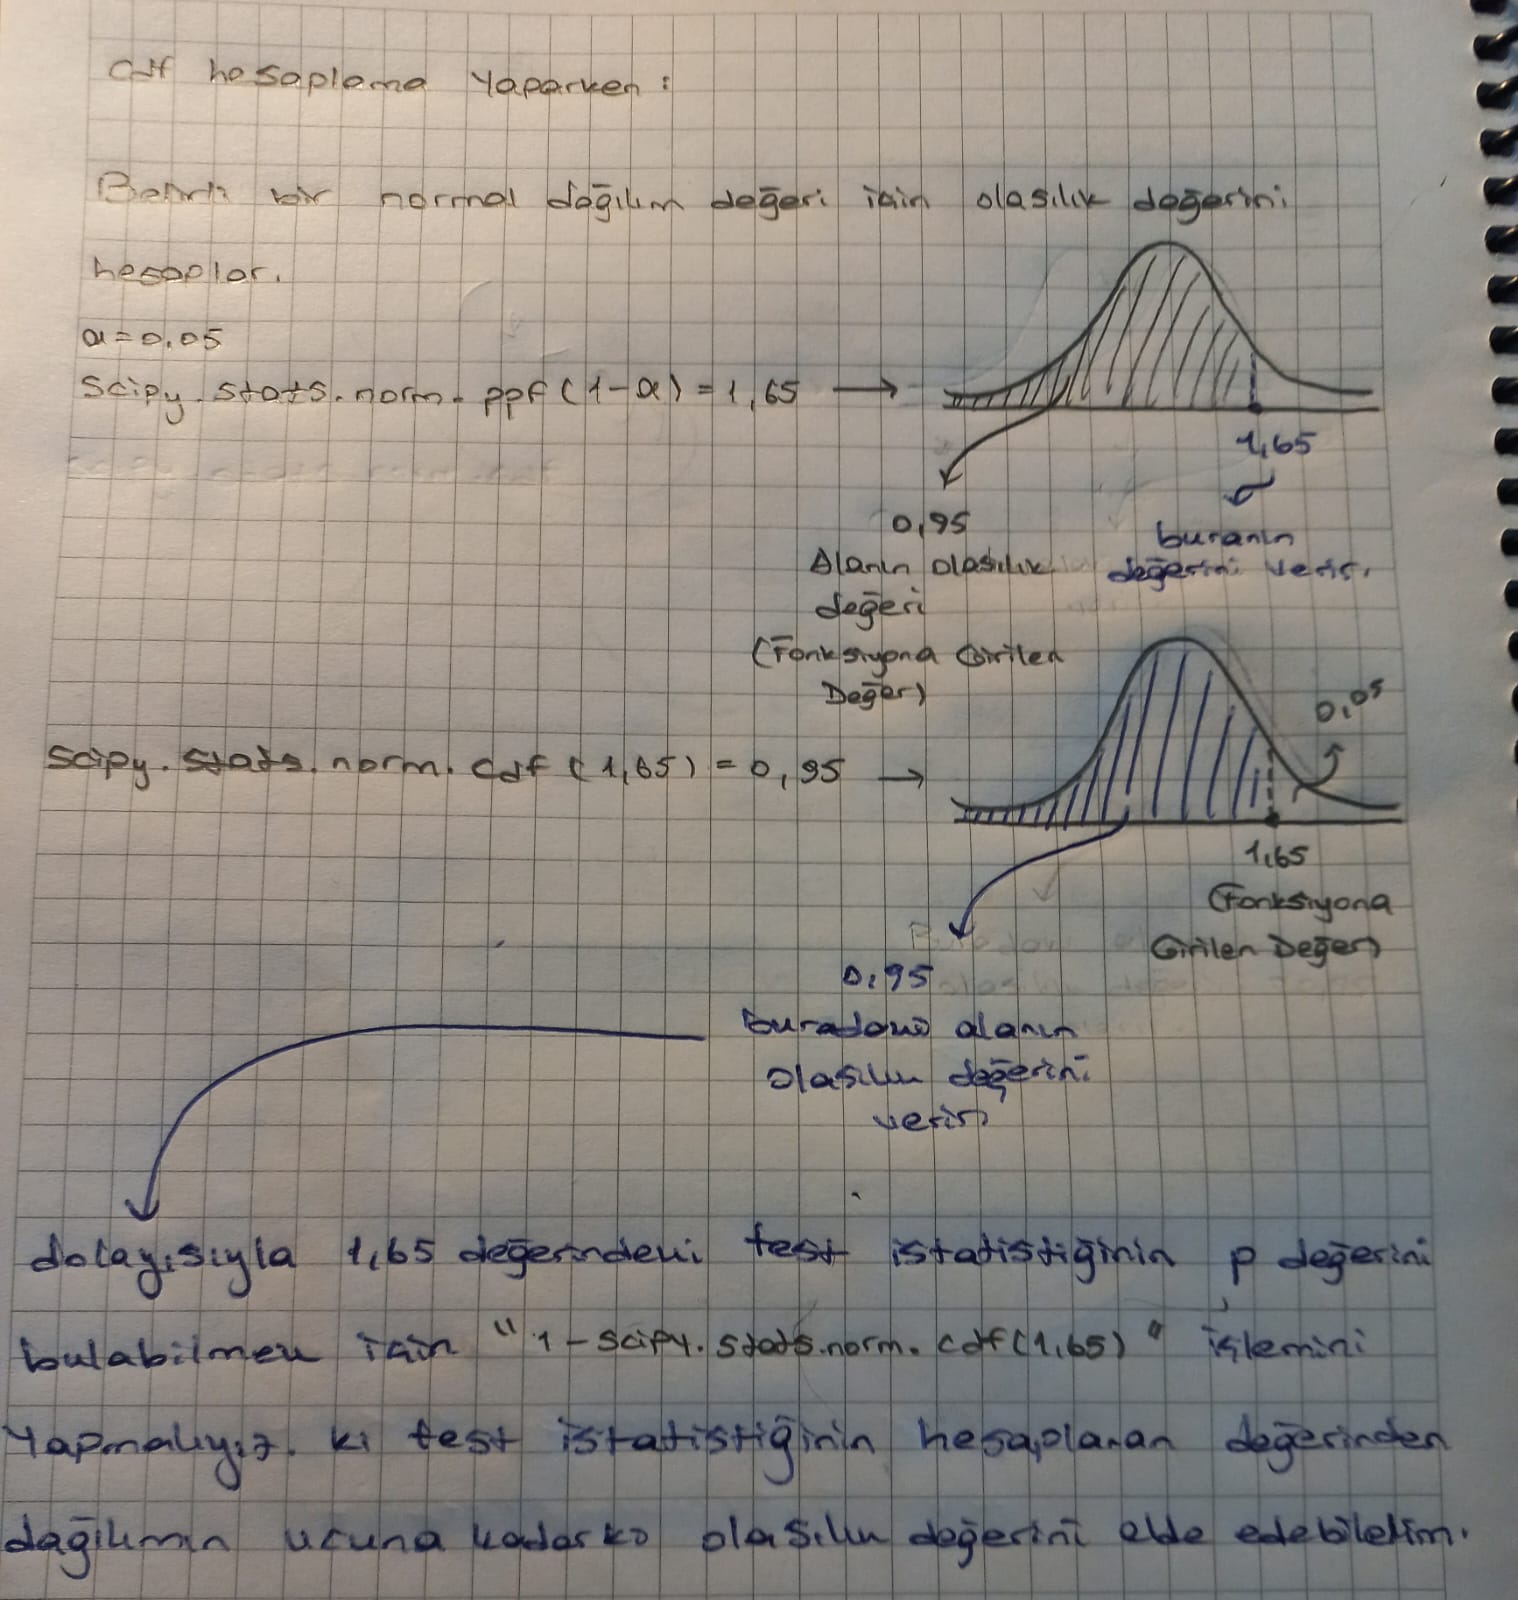

Test istatistiği = -1.293, a = 0.05 ve $H_1$ xx $\leq$ xx hipotezi kurulmuş iken:

Dağılım tek yönlü ve soldan olduğu için 1'den çıkarmaya gerek kalmadı çünkü direkt olarak cdf ile p değeri eşit olmuş oldu.

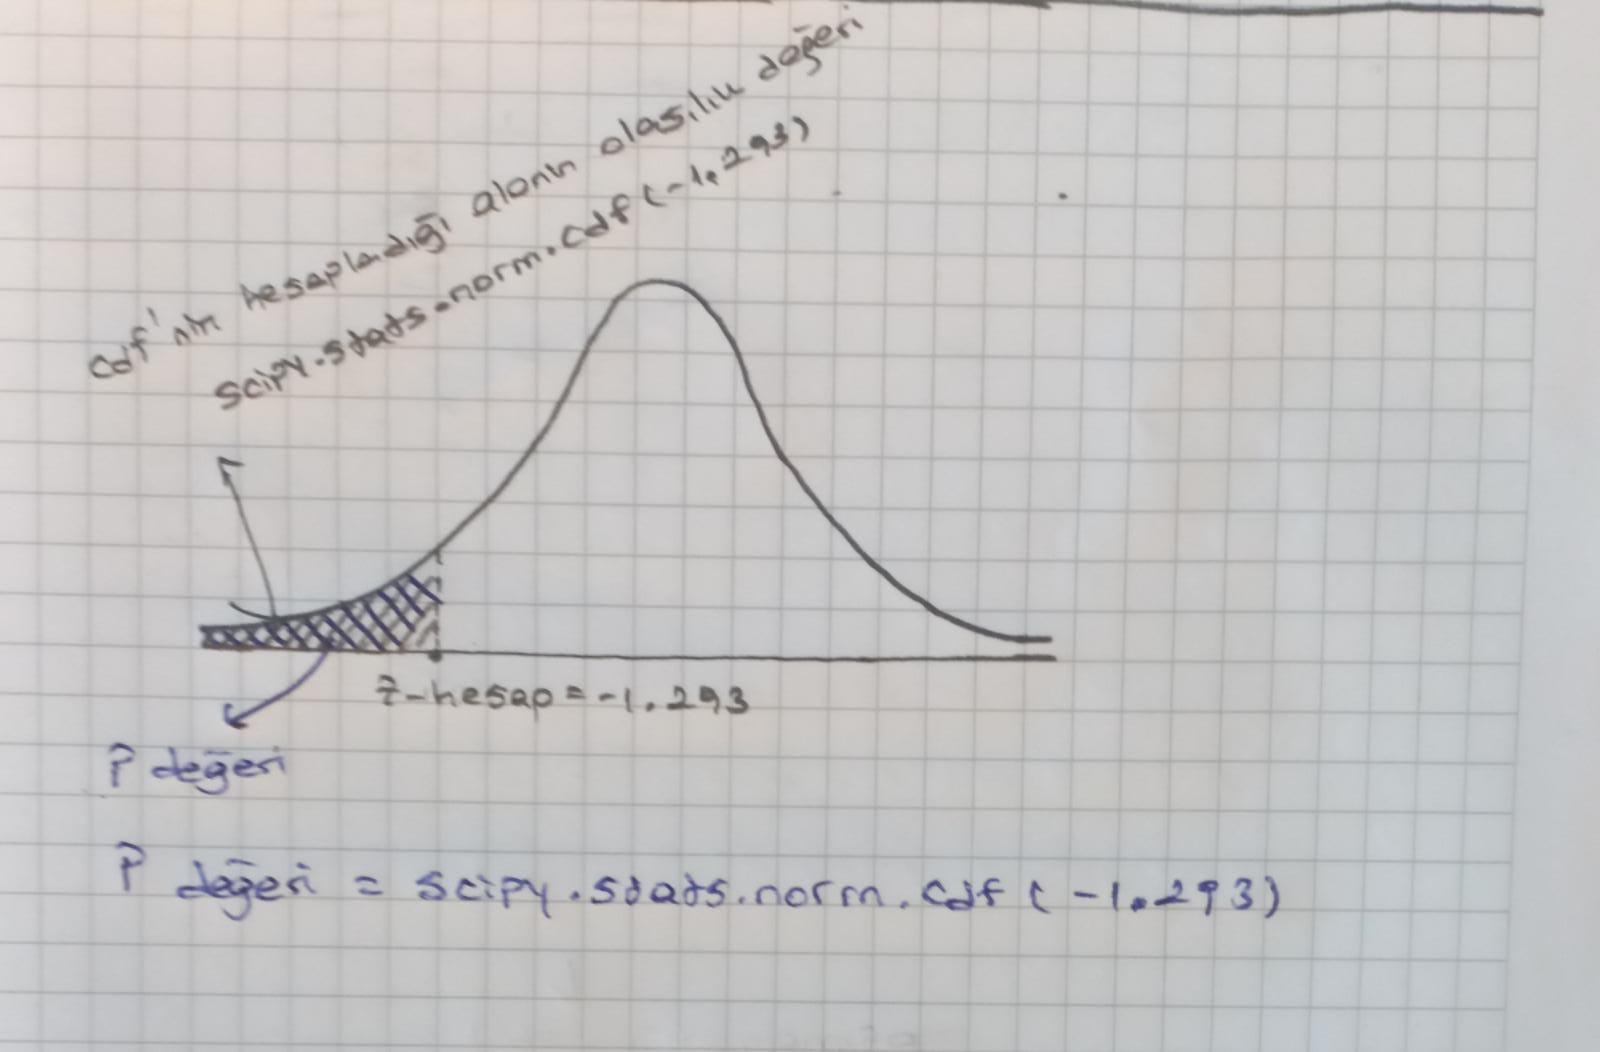

Test istatistiği = -2.04 ve 2.04 (hipotez çift yönlü) ve $H_1$ xx $\neq$ xx hipotezi kurulmuşken:

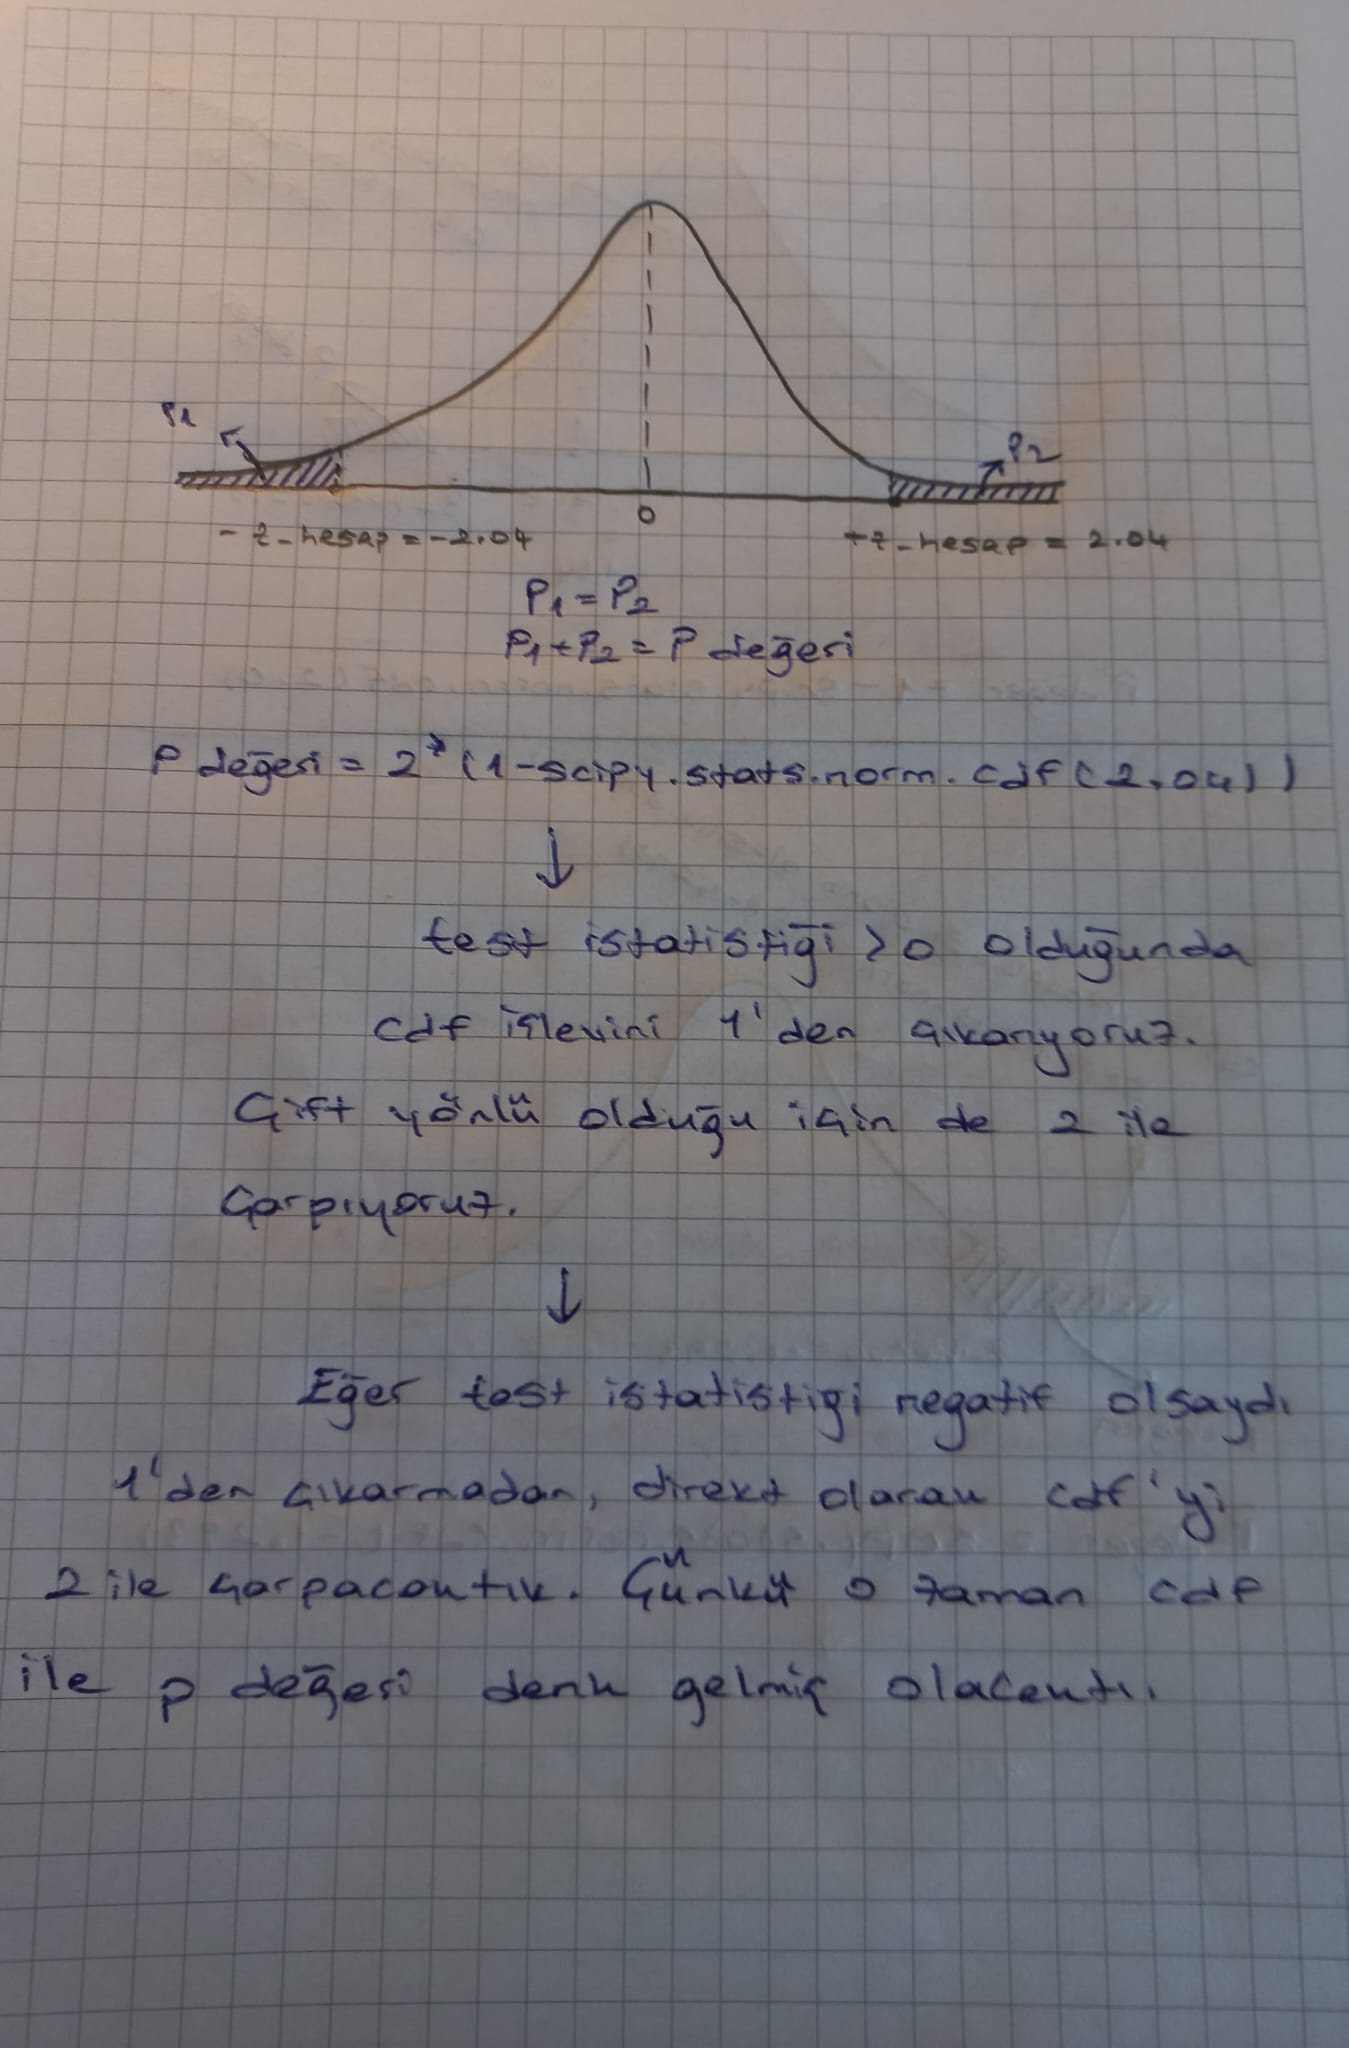

## Örnekler

### Örnek 1
Ağrı kesici bir ilacın ortalama 60 dakikadan daha fazla bir sürede
etkisini göstereceği iddia ediliyor Rastgele seçilen bir örneklemde yer alan
hastalardan 64 ’üne bu ilaç veriliyor ve ortalama ağrıyı 63 dakikada kestiği
görülüyor ve standart sapması 12 bulunuyor Bu iddianın doğruluğunu %5
anlamlılık düzeyinde test ediniz

### Çözüm
Kitle Ortalaması (Test Edilen Parametre ${\mu}$) = 60

Örneklemdeki öğe sayısı ($n$) = 64

Örneklem Ortalaması ($\bar{x}$) = 63

Örneklem Standart Sapması ($s$) = 12

Yanılma Olasılığı ($a$) = 0.05

Kitle varyansı bilinmiyor. Kullanılacak test istatistiği formülü: $Z$ = $\frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$

Kurulacak Hipotez:

$H_0:$ $\mu$ = 60

$H_1:$ $\mu$ $\geq$ 60 olur. Test tek taraflıdır. Bu yüzden kritik değeri hesaplarken a/2 kullanarak değil a'yı kullanarak hesaplama yaparız.

In [8]:
#1. Yol (Kritik değer ile test istatistiğini karşılaştırarak çözme)
import scipy.stats

#a = 0.05 iken Z tablosunun değeri (Kriktik Değer)
a = 0.05
z_table = scipy.stats.norm.ppf(1 - a, loc = 0, scale = 1)
print("Kritik Değer =", z_table)
ayrac()

#Test istatistiği hesabı
z_hesap = pop_mean_test_stat(xbar = 63, std = 12, mu = 60, n = 64)
print(z_hesap)
ayrac()

#Karar
print("Test istatistiği:",z_hesap, "\nÜst sınır:",z_table)
if z_table < z_hesap:
    print("H_0 Hiptotezi reddedilir")
else:
    print("H_0 hipotezi reddedilemez")

Kritik Değer = 1.6448536269514722

*****

2.0

*****

Test istatistiği: 2.0 
Üst sınır: 1.6448536269514722
H_0 Hiptotezi reddedilir


In [9]:
#2. Yol (P değeri ile yanılma olasılığını karşılaştırarak çözme)
import scipy.stats

#Test istatistiği hesabı
a = 0.05
z_hesap = pop_mean_test_stat(xbar = 63, std = 12, mu = 60, n = 64)
print(z_hesap)
ayrac()

#P değeri hesabı
p_value = 1 - scipy.stats.norm.cdf(z_hesap)
print(p_value)

#Karar
print("Test istatistiği :",z_hesap, "\nYanılmma olasılığı :",a, "\nP değeri :",p_value)
if a > p_value:
    print("H_0 hipotezi reddedilir")
else:
    print("H_0 hipotezi reddedilemez")

2.0

*****

0.02275013194817921
Test istatistiği : 2.0 
Yanılmma olasılığı : 0.05 
P değeri : 0.02275013194817921
H_0 hipotezi reddedilir


+ **scipy.stats.norm.cdf** işlevi dağılımın en solundan başlayıp, test istatistiğine kadar olanki alanın kümülatif dağılım fonksiyonunun olasılık değerini hesaplar. Hipotez testi tek yönlü ve sağdan olduğu için **2.0** test istatistiği değerinin P değerini bulabilmek için **p_value = 1 - scipy.stats.norm.cdf(z_hesap)** işlemini yaptık.

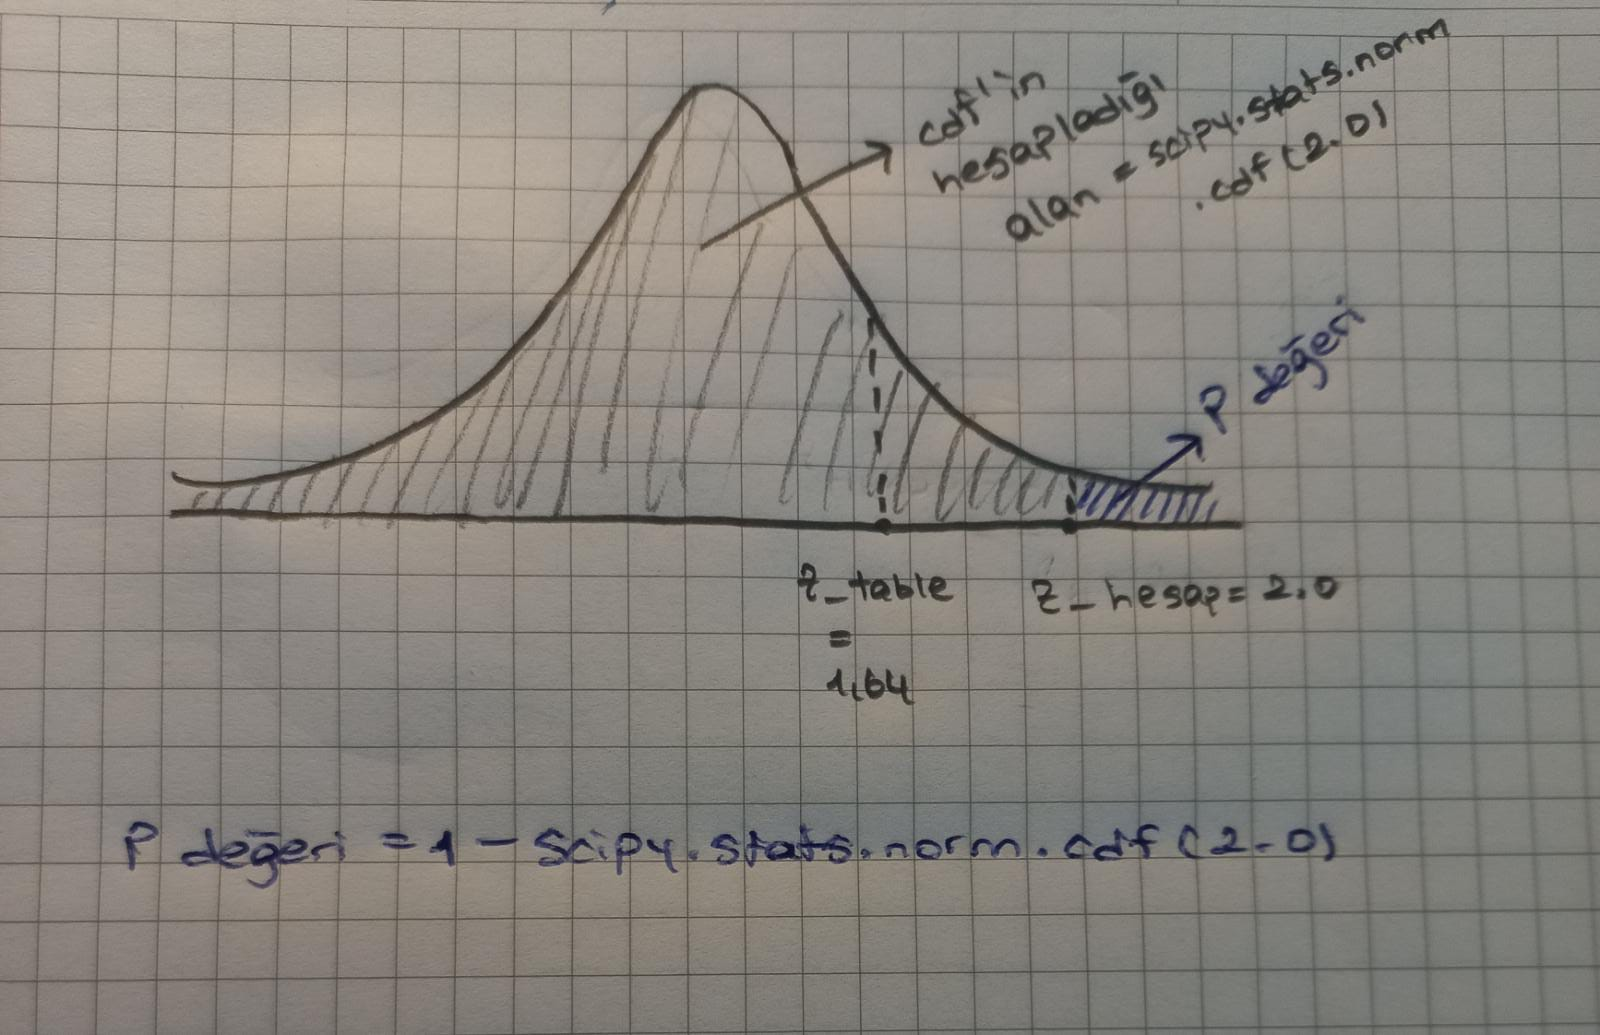

### Örnek 2
Ankara ilinde 28 Mart 2020 gününde ortalama 2 mm yağış aldığı
iddia ediliyor 28 Mart 2020 gününde saat başı yapılan tahminleri sonucunda
yağış miktarının ortalaması 1.8 mm ve standart sapması 1 mm bulunuyor
( 24 Yağış miktarının normal dağılıma uyduğu bilindiğine göre 28 Mart
2020 gününde ortalama yağış miktarının 2 mm olup olmadığını 5 anlamlılık
düzeyinde test ediniz (α =  %0.05)

### Çözüm
Kitle Ortalaması (Test Edilen Parametre $\mu$) = 2mm

Örneklem Ortalaması ($\bar{x}$) = 1.8mm

Örneklem Standart Sapması ($s$) = 1

Örneklemdeki Öğe Sayısı ($n$) = 24

Yanılma Olasılığı ($a$) = 0.05

Kitle varyansı bilinmiyor ve n $\leq$ 30. Kullanılacak test istatistiği formül: $T$ = $\frac{\bar{x} - \mu}{\frac{S}{\sqrt{n}}}$

Kurulacak hipotez:

$H_0 :$ $\mu$ = 2

$H_1 :$ $\mu$ $\neq$ 2 olur. Hipotez çift taraflı olduğu için kritik değer bulurken a/2'yi tablo değerinde hesaplarız.

In [10]:
#1. Yol (Kritik değer ile test istatistiğini karşılaştırarak çözme)
import scipy.stats 

#a = 0.05 ise a/2 = 0.025 iken Kritik değer hesabı
a = 0.05
n = 24
t_table = scipy.stats.t.ppf(q = 1-(a/2), df = n-1)
t_table_left = -1*t_table
print(t_table_left, t_table)
ayrac()

#Test istatistiği hesabı
t_hesap = pop_mean_test_stat(xbar = 1.8, mu = 2, std = 1, n = 24)
print(t_hesap)
ayrac()

#Karar
print("Test istatistiği:",t_hesap, "\nAlt sınır:",t_table_left, "\nÜst sınır:",t_table)
if t_hesap < t_table and t_hesap > t_table_left:
    print("H_0 hipotezi reddedilemez")
    
else:
    print("H_0 hipotezi reddedilir")

-2.0686576104190406 2.0686576104190406

*****

-0.9797958971132709

*****

Test istatistiği: -0.9797958971132709 
Alt sınır: -2.0686576104190406 
Üst sınır: 2.0686576104190406
H_0 hipotezi reddedilemez


In [11]:
#2. Yol (P değeri ile yanılma olasılığını karşılaştırarak çözme)
import scipy.stats

#Test istatistiği hesabı
t_hesap = pop_mean_test_stat(xbar = 1.8, mu = 2, std = 1, n = 24)
print(t_hesap)
ayrac()

#P Değeri Hesabı
a = 0.05
p_value = 2*(scipy.stats.t.cdf(t_hesap, df = n-1))
print(p_value)

#Karar
print("Test istatistiği:", t_hesap, "\nP değeri:", p_value, "\nYanılma olasılığı:", a)
if a > p_value:
    print("H_0 hipotezi reddedilir")
else:
    print("H_0 hipotezi reddedilemez")

-0.9797958971132709

*****

0.33738136682986763
Test istatistiği: -0.9797958971132709 
P değeri: 0.33738136682986763 
Yanılma olasılığı: 0.05
H_0 hipotezi reddedilemez


+ Hipotez çift yönlü olduğu için 2 ile çarptık çünkü dağılımın sağ tarafındaki p değeri, aynı şekilde sol tarafında da mevcut. Test istatistiği negatif olduğundan 1'den çıkarmadık.

### Örnek 3
Bir tür sigara paketindeki bir sigaradaki ortalama nikotin miktarının
0.7 mg aştığı iddia edilmektedir Sigaralardaki nikotin miktarları, 0.06 standart
sapma ile normal dağılış gösterdiği bilinmektedir. Bunun için bu tür markadan
rasgele bir paket alınıyor ve nikotin miktarları ölçülüyor. Nikotin miktarlarının
ortalaması 0.73 olarak bulunuyor Bu iddianın doğruluğunu %0.05 anlamlılık
düzeyinde test ediniz Bir pakette 20 sigara bulunmaktadır.

### Çözüm
Kitle Ortalaması (Test edilen parametre $\mu$) = 0.7mg

Kitle Standart Sapması ($\sigma$) = 0.06

Örneklem Ortalaması ($\bar{x}$) = 0.73

Örneklemdeki Öğe Sayısı ($n$) = 20

Yanılma Olasılığı ($a$) = 0.05

Kitle varyansı biliniyor. Uygulanacak test istatistiği formülü: $Z$ = $\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$

Kurulacak hipotez:

$H_0 :$ $\mu$ = 0.7

$H_1 :$ $\mu$ $\geq$ 0.7 olur. Hipotez tek taraflı olduğu için kritik değer hesaplarken a'nın tablo değerini buluruz.

In [12]:
#1. Yol (Kritik değer ile test istatistiğini karşılaştırarak çözme)
import scipy.stats

#a = 0.05 iken kritik değer hesabı
a = 0.05
z_table = scipy.stats.norm.ppf(1-a, loc = 0, scale = 1)
print(z_table)
ayrac()

#Test istatistiği hesabı
z_hesap = pop_mean_test_stat(xbar = 0.73, std = 0.06, mu = 0.70, n =20)
print(z_hesap)
ayrac()

#Karar
print("Test istatistiği:",z_hesap, "\nÜst sınır:",z_table)
if z_table > z_hesap:
    print("H_0 hipotezi reddedilemez")
else:
    print("H_0 hipotezi reddedilir")

1.6448536269514722

*****

2.2360679774997916

*****

Test istatistiği: 2.2360679774997916 
Üst sınır: 1.6448536269514722
H_0 hipotezi reddedilir


In [13]:
#2. Yol (P değeri ile yanılma olasılığını karşılaştırarak çözme)
import scipy.stats

#Test istatistiği hesabı
a = 0.05
z_hesap = pop_mean_test_stat(xbar = 0.73, std = 0.06, mu = 0.70, n =20)
print(z_hesap)
ayrac()

#P değeri hesabı
p_value = 1 - scipy.stats.norm.cdf(z_hesap, loc = 0, scale = 1)
print(p_value)
ayrac()

#Karar
print("Test İstatistiği :",z_hesap, "\nP Değeri :",p_value, "\nYanılma Olasılığı :",a)
if a > p_value:
    print("H_0 hipotezi reddedilir")
else:
    print("H_0 hipotezi reddedilemez")

2.2360679774997916

*****

0.0126736593387341

*****

Test İstatistiği : 2.2360679774997916 
P Değeri : 0.0126736593387341 
Yanılma Olasılığı : 0.05
H_0 hipotezi reddedilir


### Örnek 4
Televizyonda yeni yayınlanmaya başlayan bir dizi için bu diziyi
izleyenlerden rastgele seçilen 100 izleyiciye «diziyi beğendiniz mi?» sorusuna
70 ’nin cevabının «evet» olduğu görülmüştür Bu bilgileri kullanarak, kitledeki
gerçek beğeni oranının %60 olup olmadığını %5 anlamlılık düzeyinde
araştırınız

### Çözüm 
Kitle Oranı (Test edilen parametre $P_0$) = 0.60

Örneklem Oranı ($\hat{P}$) = 70/100 = 0.70

Yanılma Olasılığı ($a$) = 0.05

Örneklemdeki Öğe Sayısı ($n$) = 100

Kullanılacak test istatistiği formülü: $Z$ = $\frac{\hat{P} - P_0}{\sqrt{\frac{P_0(1-P_0)}{n}}}$

Kurulacak Hipotez:

$H_0:$ $P_0$ = 0.60

$H_1:$ $P_0$ $\neq$ 0.60 olur. Çift yönlü olduğu için kritik değeri hesaplarken Z tablosundan a/2'yi hesaplayacağız.

In [14]:
#1. Yol (Kritik değer ile test istatistiğini karşılaştırarak çözme)
import scipy.stats

#a = 0.05, a/2 = 0.025 iken kritik değer hesabı
a = 0.05
z_table = scipy.stats.norm.ppf(1-(a/2), loc = 0, scale = 1)
z_table_left = -1*z_table
print(z_table_left, z_table)
ayrac()

#Test istatistiği 
z_hesap = pop_per_test_stat(p_hat = 0.70, p = 0.60, n = 100)
print(z_hesap)
ayrac()

#Karar
print("Test istatistiği:",z_hesap, "\nAlt sınır:",z_table_left, "\nÜst sınır:",z_table)
if z_hesap > z_table_left and z_hesap < z_table:
    print("H_0 hipotezi reddedilemez")
else:
    print("H_0 hipotezi reddedilir")

-1.959963984540054 1.959963984540054

*****

2.0412414523193148

*****

Test istatistiği: 2.0412414523193148 
Alt sınır: -1.959963984540054 
Üst sınır: 1.959963984540054
H_0 hipotezi reddedilir


In [15]:
#2. Yol (P değeri ile yanılma olasılığını karşılaştırarak çözme)
import scipy.stats

#Test istatistiği hesabı
z_hesap = pop_per_test_stat(p_hat = 0.70, p = 0.60, n = 100)
print(z_hesap)
ayrac()

#P değeri hesabı
a = 0.05
p_value = 2 * (1 - scipy.stats.norm.cdf(z_hesap))
print(p_value)
ayrac()

#Karar
print("Test İstatistiği :",z_hesap, "\nP Değeri :",p_value, "\nYanılma Olasılığı :",a)
if a > p_value:
    print("H_0 hipotezi reddedilir")
else:
    print("H_0 hipotezi reddedilemez")

2.0412414523193148

*****

0.041226833337163704

*****

Test İstatistiği : 2.0412414523193148 
P Değeri : 0.041226833337163704 
Yanılma Olasılığı : 0.05
H_0 hipotezi reddedilir


+  Çift yönlü hipotez testinde p değerini hesaplamak için kuyruk alanının iki katını almanız gerektiğinden, hesaplama sonucunu 2 ile çarpıyoruz. Çünkü dağılım simetrik olduğundan, dağılımın her iki tarafında da aynı p değeri mevcut. Tam p değerini hesaplamak için 2 ile çarptık. Test istatistiği pozitif olduğundan 1'den çıkardık.

### Örnek 5 
Bir havayolu şirketinin uçuşlarının her zaman zamanında olduğunu ve
ortalama 15 dakika gecikmeyle hak talebinde bulunulduğunu varsayalım Şirket
ortalama gecikme süresinde o kadar tutarlıdır ki, standart sapmanın 12 dakika
olduğunu iddia etmektedir İddianın tutarlılığından şüphe duyan bir yolcu,
sonraki 20 uçuşunun gecikmelerini hesaplar. Bu 20 uçuş için ortalama gecikme
15 dakika, standart sapma 14 dakika olarak bulur Havayolu şirketinin iddiasını
doğru olup olmadığını test ediniz (a = 0.05)

### Çözüm
Kitle Varyansı (Test edilen parametre $\sigma^2$) = 12*12 = 144

Örneklem Varyansı ($s^2$) = 196

Örneklemdeki Öğe Sayısı ($n$) = 20

Yanılma Olasılığı ($a$) = 0.05

Kullanılacak test istatistiği formülü: $\chi^2$ = $(n-1)\frac{s^2}{\sigma_0^2}$

Kurulacak hipotez:

$H_0:$ $\sigma^2$ = 144

$H_1:$ $\sigma^2$ $\neq$ = 144

In [16]:
#1. Yol (Kritik değer ile test istatistiğini karşılaştırarak çözme)
import scipy.stats

#a = 0.05 ve a/2 = 0.025 iken kritik değer hesabı
n = 20
a = 0.05
chi2_upper = scipy.stats.chi2.ppf(1-(a/2), df = n-1)
chi2_lower = scipy.stats.chi2.ppf(a/2, df = n-1)
print(chi2_lower, chi2_upper)
ayrac()

#Test istatistiği hesabı
chi2_hesap = pop_var_test_stat(s_square = 196, sigma_square = 144, n = 20)
print(chi2_hesap)
ayrac()

#Karar 
print("Test istatistiği:",chi2_hesap, "\nAlt sınır:",chi2_lower, "\nÜst sınır:",chi2_upper)
if chi2_hesap > chi2_lower and chi2_hesap < chi2_upper:
    print("H_0 hipotezi reddedilemez")
else:
    print("H_0 hipotezi reddedilir")

8.906516481987971 32.85232686172969

*****

25.86111111111111

*****

Test istatistiği: 25.86111111111111 
Alt sınır: 8.906516481987971 
Üst sınır: 32.85232686172969
H_0 hipotezi reddedilemez
